In [1]:
%matplotlib notebook
%pylab
#%run file.ipynb #calling functions

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Make sure there are no spaces after these lines!
%reload_ext autoreload
%autoreload 2

In [3]:
from cg_functions import *

In [4]:
# user defined parameters
u = 2   # velocity
Tf = 0.025  # final time
ax = -1; 
bx = 1

init_choice = 2
if init_choice == 1:
    sigma = 1/8
    qinit = lambda x: np.exp(-(x/(2*sigma))**2)
elif init_choice == 2:
    qinit = lambda x : sin(2*pi*x)

def bc(t):
    return qinit(ax-u*t), qinit(bx-u*t)
    

# function f(q(x,t)) = u*q(x,t)

fe = lambda q: u*q
a = 0.1

## Test the solution

In [5]:
# Uncomment to time cell
# %%timeit -n 2 -r 1   # 1 run of 1 loop
# Test calculation

N = 4

Q = N+1    

Ne = 160
Np = N*Ne+1
    
xe2 = array(Lobatto_p(N))  # Lobatto point mesh
xe = xe2[::-1]

x = zeros(Np)
xel = linspace(-1,1,Ne+1)  # Element mesh
for e in range(1,Ne+1):
    ae=xel[e-1] ; be=xel[e]

    xsi=((be-ae)/2)*(xe-1) + be
    for i in range(0,N+1):
        ip=intma(e,N)[i]
        x[ip]=xsi[i]

dx = (bx-ax)/(Np-1)   # Average distance between the points

dtest = a*dx/np.abs(u)
M = int(Tf//dtest)+1    # Number of time steps
dt = Tf/M

print('N = {:d}, time_step(M = {:d})'.format(N,M))

t = linspace(0, Tf, M+1)
    
# approximate solution of the wave equation
q = Solver_1DW(N,Ne,M,Q,qinit,fe,bc,ax,bx,x,t,dt)

# exact solution
q_exact = qinit(x-u*t[M])

#error
error = max(abs(q-q_exact))
print("Done")

N = 4, time_step(M = 160)
Done


## Plot test solution

<IPython.core.display.Javascript object>


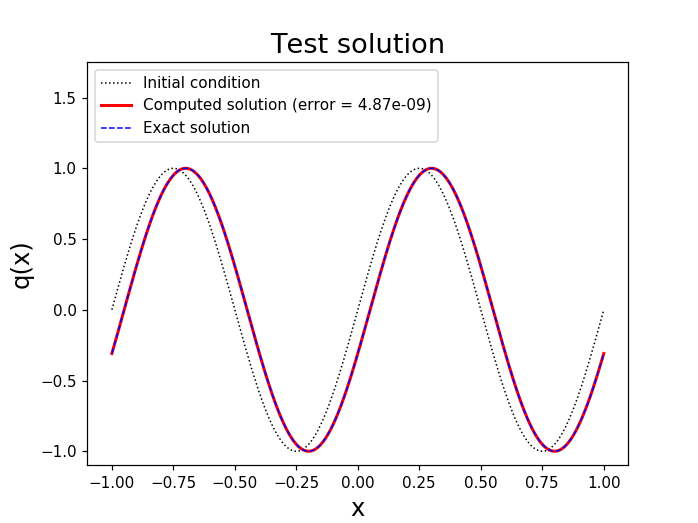

In [6]:
figure(1)
clf()

plot(x,qinit(x),'k:',linewidth=1,label='Initial condition'.format(error))
plot(x,q,'r',linewidth=2,label='Computed solution (error = {:.2e})'.format(error))
plot(x,q_exact,'b--',linewidth=1,label='Exact solution')

xlabel('x',fontsize=16)
ylabel('q(x)', fontsize=16)
title('Test solution',fontsize=18)
legend(loc='upper left')
if init_choice == 1:
    ylim([-0.1, 1.4])
elif init_choice == 2:
    ylim([-1.1,1.75])
show()

## Convergence study

In [21]:
# Order of polynomials

Order = [1,2]
P = []

# list of the number of elements
NE = array([10,20,40,80,160])
#NE = Nv
l = len(NE)

error_list = []
NP = []
for N in Order:     
    Q = N+1    
    
    xe2 = array(Lobatto_p(N))  # Lobatto point mesh
    xe = xe2[::-1]

    # array that contains the error for each iteration
    Error = zeros(l)
    for ne in range(l):

        Ne = NE[ne]
        Np = N*Ne+1
        NP.append(Np)
        # space stuff
        #x = np.linspace(-1, 1, Np)

        x = zeros(Np)
        xel = linspace(-1,1,Ne+1)  # Element mesh
        for e in range(1,Ne+1):
            ae=xel[e-1] ; be=xel[e]

            xsi=((be-ae)/2)*(xe-1) + be
            #print('a=',a)
            #print('b=',b)
            #print('xsi=',xsi)
            for i in range(0,N+1):
                ip=intma(e,N)[i]
                #print('ip=',ip)
                x[ip]=xsi[i]
        #x = np.linspace(-1, 1, Np)

        dx = (bx-ax)/(Np-1)   # Average distance between the points

        #time stuff

        fixed_dt = True
        if (fixed_dt):
            dx0 = (bx-ax)/(NE[0]*N)
            dtest = a*dx0/np.abs(u)
            M0 = int(Tf//dtest)+1    # Number of time steps
            dt0 = Tf/M0

            f = log2(dx0/dx)
            dt = dt0/2**f
            M = int(M0*2**f)
        else:        
            dtest = a*dx/np.abs(u)
            M = int(Tf//dtest)+1    # Number of time steps
            dt = Tf/M

        print('N = {:d}, time_step(M = {:d})'.format(N,M))

        t = linspace(0, Tf, M+1)

        # approximate solution of the wave equation
        q = Solver_1DW(N,Ne,M,Q,qinit,fe,bc,ax,bx,x,t,dt)

        # exact solution
        q_exact = qinit(x-u*t[M])
        #error
        error = abs(q-q_exact)
        Error[ne] = max(error)
        
    error_list.append((N,Error))
    
        #error = sqrt(sum((q-q_exact)**2)/sum(q_exact**2))
        #Error[ne] = error
        #plot of the computed and exact solutions

        #figure(ne)
        #plot(x, q, label = 'Computed: Ne = {}'.format(Ne))
        #plot(x, q_exact, '--', label = 'Exact: N = {}, Ne = {}'.format(N,Ne))

        #xlabel('NE')
        #ylabel('q')
        #legend()
        #grid() 
print("Done!")

N = 1, time_step(M = 3)
N = 1, time_step(M = 6)
N = 1, time_step(M = 12)
N = 1, time_step(M = 24)
N = 1, time_step(M = 48)
N = 2, time_step(M = 5)
N = 2, time_step(M = 10)
N = 2, time_step(M = 20)
N = 2, time_step(M = 40)
N = 2, time_step(M = 80)
Done!


## Plot error vs. number of elements (NE)

<IPython.core.display.Javascript object>


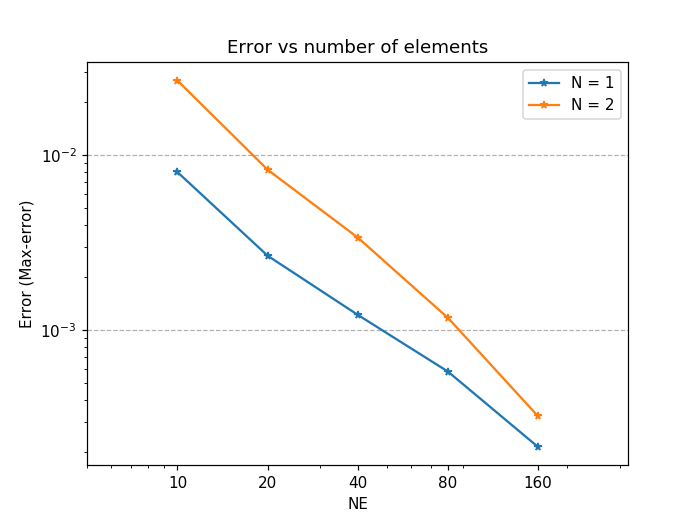

In [22]:
import cg_graphics

figure(2)
clf()
    
for e in error_list:
    N = e[0]
    Error = e[1]        
    loglog(NE, Error,'-*',markersize=5, label = 'N = {}'.format(N))

xlabel('NE')
ylabel('Error (Max-error)')
title('Error vs number of elements')
cg_graphics.set_xticks(NE)  # Create nice tick marks for NE
legend()
grid(axis='y',linestyle='--')
show()

## Plot error vs. degrees of freedom (DOF)

<IPython.core.display.Javascript object>


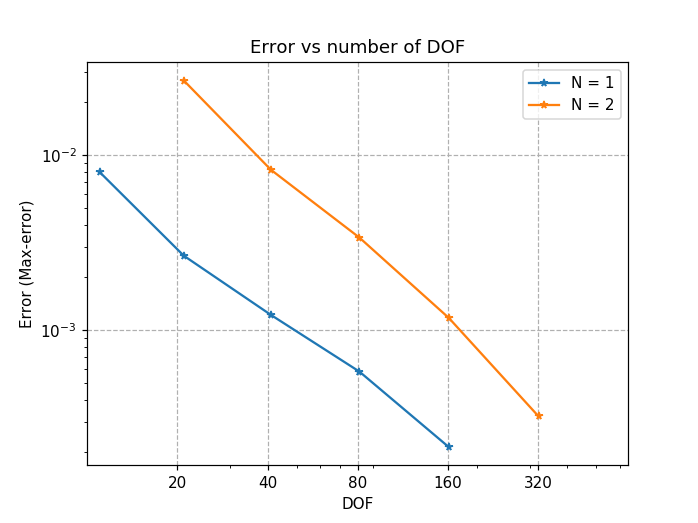

In [23]:
import cg_graphics
figure(3)
clf()  
for e in error_list:
    N = e[0]
    Error = e[1]
    
    Np = NE*N+1
    
    loglog(Np, Error,'-*',markersize=5, label = 'N = {}'.format(N))
    
    p = polyfit(log(NE), log(Error),1)
    #print('N = {:d}, rate = {:f}'.format(N,p[0]))
    P.append(p[0])

xlabel('DOF')
ylabel('Error (Max-error)')
title('Error vs number of DOF')
cg_graphics.set_xticks(NE*N)  # Create nice tick marks for NE
grid(axis='both',linestyle='--')
legend()
show()    

## Convergence Rates

In [24]:
for i in range(len(Order)):
    print('N = {:d}, rate = {:f}'.format(Order[i],P[i]))

N = 1, rate = -1.264019
N = 2, rate = -1.556448


In [25]:
NP = {}
for i in range(len(Order)):
    NP[i] = NE*Order[i] + 1
    
#NP

In [26]:
print("{:>8s} {:>12s} {:>8s} {:>8s} {:>12s} {:>8s}".format('N(1)','error(1)','rate(1)','N(2)',\
                                                           'error(2)','rate(2)'))
print("{:s}".format('-'*65))

for i in range(len(NE)):
    
    rate_str = ['']*2
    if i == 0:
        rs = format("{:>8s}").format('---')
        rate_str = [rs]*2
    else:
        rs1 = log2(error_list[0][1][i-1]/error_list[0][1][i])  
        rs2 = log2(error_list[1][1][i-1]/error_list[1][1][i])
        rstr = "{:8.4f}"
        rate_str = [rstr.format(rs1), rstr.format(rs2)]

        
    print("{:>8d} {:12.4e} {:>8s} {:>8d} {:12.4e} {:>8s}".format(NP[0][i], error_list[0][1][i],rate_str[0], \
                                                   NP[1][i], error_list[1][1][i],rate_str[1]))

    N(1)     error(1)  rate(1)     N(2)     error(2)  rate(2)
-----------------------------------------------------------------
      11   7.9875e-03      ---       21   2.6652e-02      ---
      21   2.6578e-03   1.5875       41   8.2410e-03   1.6933
      41   1.2204e-03   1.1229       81   3.3732e-03   1.2887
      81   5.7832e-04   1.0774      161   1.1725e-03   1.5245
     161   2.1431e-04   1.4321      321   3.2097e-04   1.8691


In [27]:
f1 = open("cg.txt", "w")
f1.write("N(1)             N(2)")
for i in range(len(NE)):
    
    f1.write("\n%e  %e "%(error_list[0][1][i], error_list[1][1][i]))
    
f1.close()